#PCA / KPCA
## data pre-processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as colorList

In [3]:
# * please modify the test and training file path before you run the code * #
# you can update the test and training file from google drive or local directory
train_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCA_assigment3/Data_csv_fix/usps.csv', header=None)# header=None means no table head


train_set.info()
train_set.head()
#7290, 257
# train_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Columns: 257 entries, 0 to 256
dtypes: float64(256), int64(1)
memory usage: 14.3 MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,7,-1.00000,-1.00000,-1.00000,-1.00000,-0.99973,-0.98954,-0.86016,-0.39592,0.048299,-0.282150,-0.81692,-0.988560,-0.99987,-1.000000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99989,-0.996210,-0.94284,-0.61272,0.13081,0.51204,-0.042048,-0.75781,-0.98488,-0.99983,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99997,-0.99820,-0.967390,-0.75930,-0.15724,...,0.84623,0.887280,0.87054,0.629770,0.002161,-0.69042,-0.962490,-0.998340,-0.99730,-0.95597,-0.744840,-0.25252,0.31165,0.63332,0.80141,0.90215,0.91953,0.819450,0.55888,0.049978,-0.56554,-0.91246,-0.99386,-0.99986,-0.99984,-0.99588,-0.95769,-0.81463,-0.54773,-0.214730,0.13130,0.38473,0.433070,0.19340,-0.23744,-0.64985,-0.906360,-0.98867,-0.99948,-0.99999
1,6,-0.99993,-0.99364,-0.90031,-0.63262,-0.44315,-0.45444,-0.47487,-0.43118,-0.494540,-0.583650,-0.56865,-0.400270,-0.15546,-0.086001,-0.36908,-0.82261,-0.99984,-0.98629,-0.78217,-0.15645,0.395210,0.49387,0.47580,0.52336,0.45507,0.354270,0.36334,0.49925,0.64722,0.60774,0.11068,-0.67971,-0.99989,-0.99045,-0.83741,-0.21832,0.631770,0.91957,0.92936,...,0.53255,0.513450,0.54880,0.655780,0.789450,0.89043,0.678960,-0.031372,-0.90403,-0.71232,-0.436570,-0.13060,0.16574,0.40718,0.54684,0.61107,0.71734,0.835280,0.84777,0.774510,0.69767,0.55865,0.17006,-0.51439,-0.99368,-0.97266,-0.91226,-0.80143,-0.66350,-0.509440,-0.38808,-0.27364,0.001094,0.29483,0.31692,0.11349,-0.092331,-0.32939,-0.58468,-0.86879
2,5,-1.00000,-1.00000,-1.00000,-0.99999,-0.99999,-0.99999,-0.99999,-0.99932,-0.976300,-0.725920,-0.10968,0.075605,-0.42961,-0.875420,-0.99257,-0.99992,-1.00000,-1.00000,-0.99997,-0.99953,-0.998600,-0.99875,-0.99961,-0.99764,-0.94359,-0.517800,0.29263,0.20934,-0.51399,-0.91730,-0.99552,-0.99995,-1.00000,-0.99997,-0.99899,-0.98783,-0.965100,-0.97005,-0.99142,...,-0.54914,0.007506,0.60255,0.278310,-0.623000,-0.97292,-0.999480,-0.999990,-1.00000,-1.00000,-1.000000,-0.99999,-0.99980,-0.99773,-0.99140,-0.97129,-0.76147,-0.073167,0.52270,0.127310,-0.68898,-0.98010,-0.99977,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.999970,-0.99978,-0.98882,-0.821860,-0.27738,0.13650,-0.24782,-0.809500,-0.98812,-0.99986,-1.00000
3,8,-1.00000,-0.99980,-0.99414,-0.93229,-0.67368,-0.19206,0.21882,0.33722,0.193370,-0.065072,-0.36270,-0.634720,-0.83027,-0.952960,-0.99450,-0.99976,-0.99997,-0.99725,-0.94833,-0.68044,-0.096799,0.38420,0.44606,0.40022,0.44209,0.485950,0.43804,0.16987,-0.26899,-0.73511,-0.95649,-0.99767,-0.99985,-0.98866,-0.81983,-0.22845,0.411290,0.33401,-0.22929,...,0.31869,-0.564090,-0.95483,-0.998320,-0.999980,-1.00000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-0.99989,-0.99060,-0.83967,-0.22912,0.53274,0.31746,-0.590120,-0.96563,-0.999070,-0.99999,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99991,-0.99194,-0.864490,-0.37386,0.19653,0.002823,-0.69590,-0.97637,-0.99946,-1.000000,-1.00000,-1.00000,-1.00000
4,4,-1.00000,-0.99997,-0.99745,-0.95750,-0.80168,-0.51062,-0.10797,0.21726,0.216430,-0.008529,-0.46721,-0.856600,-0.98467,-0.999380,-0.99999,-1.00000,-1.00000,-0.99987,-0.98915,-0.82596,-0.299970,0.26809,0.53511,0.54783,0.53015,0.556280,0.18222,-0.55089,-0.92927,-0.99632,-0.99996,-1.00000,-1.00000,-0.99980,-0.98248,-0.72716,-0.020961,0.42355,0.27788,...,-0.34276,-0.385420,-0.34434,-0.085541,0.425410,0.55197,-0.075396,-0.769780,-0.92637,-0.62335,-0.082607,0.36669,0.55482,0.58454,0.56886,0.56249,0.55985,0.548770,0.52354,0.527450,0.50754,0.16149,-0.50065,-0.90440,-0.99077,-0.92724,-0.74821,-0.48887,-0.19625,0.051176,0.21436,0.33924,0.458490,0.47346,0.37224,0.17332,-0.144180,-0.54225,-0.86303,-0.98198


In [4]:
test_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCA_assigment3/usps.t.csv', header=None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,10,-1.00000,-0.99993,-0.99789,-0.97373,-0.85577,-0.59742,-0.28925,0.001891,0.199200,0.292160,0.058410,-0.39888,-0.78280,-0.95867,-0.99711,-0.99993,-0.99997,-0.99847,-0.97430,-0.81816,-0.37763,0.17845,0.46183,0.48663,0.45642,0.45859,0.44104,0.27768,-0.27157,-0.79439,-0.97639,-0.99899,-0.99941,-0.98438,-0.84198,-0.36013,0.27631,0.512250,0.31714,...,0.540310,0.451330,-0.494570,-0.94249,-0.99765,-0.999980,-1.00000,-1.00000,-1.00000,-1.00000,-1.000000,-1.00000,-0.99993,-0.99334,-0.88061,-0.34936,0.44583,0.32444,-0.58400,-0.96789,-0.999290,-0.99999,-1.00000,-1.00000,-1.00000,-1.00000,-1.000000,-1.000000,-0.99997,-0.99703,-0.94152,-0.61575,-0.028963,-0.049759,-0.69540,-0.97711,-0.99954,-1.00000,-1.00000,-1.00000
1,7,-1.00000,-1.00000,-0.99981,-0.99662,-0.97803,-0.95458,-0.97524,-0.995480,-0.999750,-1.000000,-1.000000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99984,-0.99549,-0.95043,-0.78967,-0.64705,-0.80036,-0.95863,-0.99759,-0.99997,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99994,-0.99726,-0.95563,-0.72925,-0.24208,-0.024544,-0.50757,...,0.437160,0.330050,0.088705,-0.28670,-0.64324,-0.864370,-0.96852,-0.99694,-0.96670,-0.84565,-0.618510,-0.41952,-0.34467,-0.33423,-0.34637,-0.41450,-0.53458,-0.60556,-0.70474,-0.84866,-0.954110,-0.99058,-0.99838,-0.99989,-0.99828,-0.98970,-0.960600,-0.911710,-0.88744,-0.88373,-0.88866,-0.91404,-0.955920,-0.973470,-0.98122,-0.99108,-0.99789,-0.99980,-0.99998,-1.00000
2,4,-0.99811,-0.96389,-0.76737,-0.28784,0.23419,0.46762,0.50425,0.501690,0.480120,0.345490,-0.006737,-0.43813,-0.74948,-0.93664,-0.99444,-0.99982,-0.99192,-0.86303,-0.34559,0.40153,0.73665,0.69136,0.58192,0.52706,0.54450,0.56890,0.51862,0.36421,-0.10646,-0.69030,-0.95358,-0.99763,-0.98688,-0.78692,-0.11420,0.54543,0.46287,0.001139,-0.33195,...,0.204270,0.464130,0.647990,0.78937,0.64523,0.068008,-0.69871,-0.97837,-0.97861,-0.70376,0.027874,0.50207,0.59294,0.62798,0.64039,0.63778,0.67140,0.70219,0.61266,0.38255,-0.029025,-0.54885,-0.89982,-0.99380,-0.99373,-0.89889,-0.549310,-0.061385,0.27851,0.45660,0.47044,0.35077,0.191870,0.033329,-0.22581,-0.52358,-0.74711,-0.91768,-0.98833,-0.99942
3,7,-1.00000,-1.00000,-0.99999,-0.99979,-0.99768,-0.99275,-0.99240,-0.997560,-0.999840,-1.000000,-1.000000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99995,-0.99913,-0.99155,-0.95043,-0.87298,-0.87268,-0.95961,-0.99733,-0.99997,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99987,-0.99765,-0.97941,-0.88245,-0.62333,-0.345910,-0.41982,...,-0.099344,-0.156550,-0.323820,-0.48628,-0.70607,-0.905350,-0.98415,-0.99838,-0.99430,-0.96798,-0.911360,-0.84735,-0.81347,-0.82960,-0.80260,-0.80362,-0.78402,-0.80797,-0.87608,-0.92817,-0.971390,-0.99395,-0.99933,-0.99996,-0.99988,-0.99875,-0.995410,-0.991140,-0.98881,-0.98993,-0.98805,-0.98812,-0.986760,-0.988420,-0.99313,-0.99655,-0.99899,-0.99989,-0.99999,-1.00000
4,7,-1.00000,-1.00000,-1.00000,-0.99984,-0.99720,-0.97614,-0.85401,-0.519440,-0.095883,0.053946,-0.394660,-0.85809,-0.99134,-0.99990,-1.00000,-1.00000,-1.00000,-1.00000,-0.99980,-0.99557,-0.95638,-0.80099,-0.40631,0.19309,0.47759,0.22834,-0.40423,-0.86950,-0.99218,-0.99991,-1.00000,-1.00000,-1.00000,-0.99979,-0.99515,-0.94758,-0.73140,-0.258600,0.28262,...,0.379830,-0.035324,0.057183,0.34100,0.38573,-0.006424,-0.57682,-0.90706,-0.30059,0.34402,0.594920,0.60796,0.61516,0.66417,0.84884,0.88845,0.72285,0.51330,0.42517,0.26069,-0.187960,-0.64667,-0.91051,-0.98942,-0.78568,-0.42677,-0.092076,0.168360,0.38327,0.45627,0.47287,0.47048,0.385180,0.124520,-0.19897,-0.50829,-0.78615,-0.94403,-0.99204,-0.99945


In [5]:
Y_train = train_set[[0]]
X_train = train_set.drop([0], axis=1)

Y_test = test_set[[0]]
X_test = test_set.drop([0], axis=1)

Y_train.shape

(7291, 1)

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train.describe()

(7291, 256)
(7291, 1)
(2007, 256)
(2007, 1)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.00000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,-0.991950,-0.97257,-0.930964,-0.853716,-0.734950,-0.580235,-0.392483,-0.226989,-0.217470,-0.351633,-0.517160,-0.670813,-0.799098,-0.893281,-0.953961,-0.985741,-0.982065,-0.939628,-0.848189,-0.687138,-0.468550,-0.236652,-0.010466,0.169037,0.166962,0.000575,-0.195308,-0.405139,-0.621117,-0.796838,-0.910481,-0.970707,-0.972356,-0.908924,-0.774088,-0.553005,-0.301348,-0.108794,0.024147,0.121127,...,0.166159,0.024651,-0.141095,-0.303593,-0.503046,-0.706664,-0.860318,-0.950807,-0.967534,-0.900372,-0.776626,-0.597046,-0.395850,-0.199060,0.025453,0.235162,0.235608,0.005348,-0.262960,-0.495507,-0.691878,-0.836109,-0.924089,-0.972632,-0.989307,-0.964932,-0.913203,-0.820483,-0.683147,-0.506932,-0.296504,-0.119810,-0.139152,-0.359603,-0.598772,-0.769278,-0.876054,-0.937036,-0.970459,-0.989290
std,0.050670,0.11769,0.195285,0.283359,0.372715,0.434278,0.450939,0.452378,0.443575,0.453506,0.451192,0.409109,0.340865,0.251544,0.153589,0.069810,0.087665,0.196377,0.324313,0.456783,0.562683,0.603307,0.563945,0.530914,0.522353,0.554131,0.601023,0.583587,0.511117,0.395128,0.256218,0.122695,0.112830,0.244390,0.392804,0.530116,0.611497,0.613812,0.548674,0.558277,...,0.509641,0.542963,0.654595,0.669870,0.598106,0.466833,0.311509,0.156559,0.121693,0.252869,0.388929,0.516853,0.615278,0.648044,0.586908,0.520795,0.513429,0.583098,0.628686,0.570768,0.458312,0.336314,0.224045,0.113496,0.056889,0.125345,0.206803,0.301806,0.398598,0.471101,0.480959,0.451754,0.449720,0.457964,0.421860,0.337005,0.251085,0.183011,0.122033,0.059531
min,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.00000,-1.000000,-0.999920,-0.996115,-0.964105,-0.786575,-0.615925,-0.561990,-0.775265,-0.947830,-0.993910,-0.999860,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999990,-0.999570,-0.985775,-0.859620,-0.525200,-0.123450,-0.093591,-0.486220,-0.823000,-0.978760,-0.998950,-0.999980,-1.000000,-1.000000,-1.000000,-1.000000,-0.999910,-0.995875,-0.948630,-0.730690,-0.440615,-0.320830,...,-0.209760,-0.4425

## nomlization

In [7]:
# normlization  mean -> 0
def norml(x):
    m = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - m)/std

X_train = norml(X_train)
X_test = norml(X_test)
# X_test.describe()
print(X_test[:5])

        1         2         3    ...       254       255       256
0 -0.170354 -0.240336 -0.355618  ... -0.346660 -0.243330 -0.177938
1 -0.170354 -0.240917 -0.365450  ... -0.345579 -0.243154 -0.177938
2 -0.133532  0.058847  0.824877  ...  0.098304 -0.140523 -0.166825
3 -0.170354 -0.240917 -0.366372  ... -0.346065 -0.243242 -0.177938
4 -0.170354 -0.240917 -0.366423  ... -0.044126 -0.173206 -0.167400

[5 rows x 256 columns]


##PCA/KPCA

In [0]:
from numpy import linalg
from scipy.spatial.distance import pdist, squareform

def central(K):
    N = K.shape[0]
    #center the kernel matrix
    one_n = np.ones((N, N))/N
    #centralization
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K


# kernal function
def linear_K(X):
    K = np.dot(X, X.T)
    K = central(K)
    return K

def polynomial_K(X, d=2):
    
    K = (1 + np.dot(x, X.T))**d
    K = central(K)
    return K

def gaussianRBF_K(X,sigma=15):
    #calculate pariwise squared Euclidean distances
    distance = pdist(X, 'sqeuclidean')
    # print(distance.shape)
    # distance -> matrix (very important !)
    distance_mat = squareform(distance)
    
    #comput the symmetric kernel matrix
    K = np.exp(-sigma * distance_mat)
    K = central(K)
    return K

In [0]:
def K_PCA(x, num_f, plot=True, info=True, kernel=None):
    
    # eigenvalue and eigenvector
    # Cv = λv
    # C is convariance matrix
    # v is eigen vector
    # lambda is eigenvalues
    
    if kernel == None:
        eigen_w, eigen_v = np.linalg.eig(np.cov(x.T))
    else:
    #   so hard to understand!!!
    #   feature map <-> kernal function
        K = kernel(x, 15)
        eigen_w, eigen_v = np.linalg.eig(K)
 
    if info:
        print("the number of eigen values:{0} \n the number of eigen vectors: {1} \n the dimension of 1 eigenvector {2}"
          .format(eigen_w.shape[0],eigen_v.shape[0], eigen_v.shape[1]))

    if info:
        print(' after sorting, the number of eigenvalues: {0}'.format(eigen_w.shape))
    
    # sort 
    order = np.argsort(eigen_w)[::-1]
    # print(order)
    eigen_w_s = eigen_w[order]
    eigen_v_s = eigen_v[:, order]

    # Y - variance
    # X - data
    if plot:
        pd.DataFrame(eigen_w_s[:15]).plot(kind='bar')

    if kernel == None:          
        # select 10 relative feature
        v = eigen_v_s[:, :num_f]
        X_new = x.dot(v)
    else:  
        # projection
        # X_new = np.column_stack((eigen_v_s[:, i] for i in range(0, num_f)))
        for i in range(0, num_f):
        # eigen_w_s = np.diag(eigen_w_s)
             eigen_v_s[:,i] = eigen_v_s[:, i] / np.sqrt(eigen_w_s[i])
        eigen_v_s = eigen_v_s[:, :num_f]
        # print('v new shape:', eigen_v_s.shape)
        X_new = K.dot(eigen_v_s)
        # print(X_new.shape)
       
    return X_new

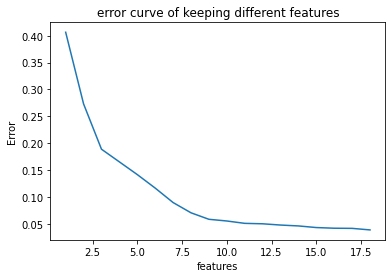

In [12]:
from sklearn.model_selection  import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def score(x, y):
    knn = KNeighborsClassifier(n_neighbors=4)
    scores = cross_val_score(knn, x, y[0], cv=6, scoring='accuracy')
    return scores

def eval(x, y):
    scorelist = []
    for i in x:
        s = score(i, y)
        scorelist.append(1-s.mean())

    plt.plot([i for i in range(len(scorelist), 0, -1)],scorelist)
    plt.title('error curve of keeping different features')
    plt.xlabel('features')
    plt.ylabel('Error')
    plt.show()   


## try to find the best feature dim to split ##
train_list = []
for i in range(20, 2, -1):
    # training set PCA processing
    X_new = K_PCA(X_train, i, plot=False, info=False)
    # test set PCA processing
    Xt_new = K_PCA(X_test, i, plot=False, info=False)
    train_list.append(X_new)

eval(train_list, Y_train)


  

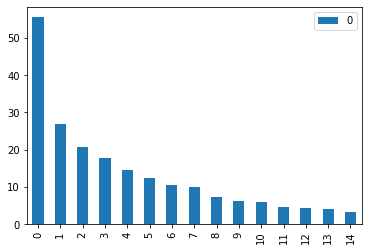

In [13]:
#small samples
X_tests = X_test[:300]
X_trains = X_train[:300]
# Y_tests = Y_test[:300]
# Y_trains = Y_train[:300]

# training set PCA processing
Xs_new = K_PCA(X_train, 10, plot=True, info=False)
# test set PCA processing
Xts_new = K_PCA(X_test, 10, plot=False, info=False)

# training set KPCA with gaussianRBF_K
XK_new = K_PCA(X_trains, 10, kernel=gaussianRBF_K, plot=False, info=False)
XKt_new = K_PCA(X_tests, 10, kernel=gaussianRBF_K, plot=False, info=False)

#print(XK_new.shape)
#print(XKt_new_2.shape)
#print(Y_train.shape)  

##KNN
we use K Nearest Neighbors algorithm to impelemented classifier by referring sklearn

In [0]:
# find best neighour number (best K)
def best_K(x, y, data_info):

    k_range = range(1,10)
    k_error = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x, y[0], cv=6, scoring='accuracy')
        k_error.append(1 - scores.mean())

    plt.plot(k_range, k_error)
    plt.title('find best k value for {0}'.format(data_info))
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Error')
    plt.show()   

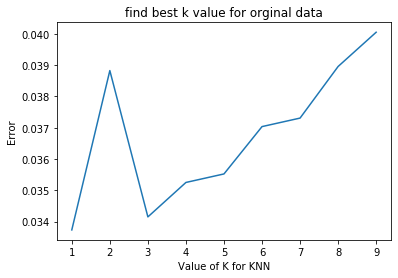

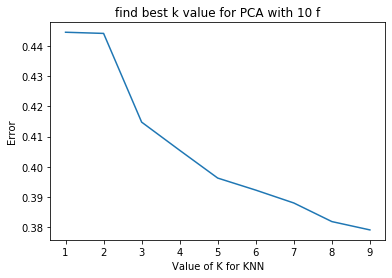

In [0]:
# orginal data
best_K(X_train, Y_train, "orginal data")
# PCA (keep 10 features)
best_K(X_new, Y_train, "PCA with 10 f")

##plot

In [0]:

# X_test[2007, 256] Y_test[2007, 1]
print(X_test.iloc[:,:2].shape, Y_test[0].shape)


def KNN_plt (x_tra, y_tra, x_te, y_te, step=0.02, model=KNeighborsClassifier, tit=None):
    
    # samples and labels
    x_tra = pd.DataFrame(x_tra)
    x_te = pd.DataFrame(x_te)
    
    X = x_tra.iloc[:,:2]
    Y = y_tra[0]
    
    print(X.shape, Y.shape)
    
    Xt = x_te.iloc[:,:2]
    Yt = y_te[0]
   
    # classification colors and sample colors
    cmap_class_c = colorList(['#FAEBD7', '#00FFFF', '#FFEBCD', '#8A2BE2', '#A52A2A', 
                            '#5F9EA0', '#FF7F50', '#FFF8DC', '#B8860B', '#ADFF2F'])
    
    cmap_samples_c = colorList(['#FAEBD7', '#00FFFF', '#FFEBCD', '#8A2BE2', '#A52A2A', 
                            '#5F9EA0', '#FF7F50', '#FFF8DC', '#B8860B', '#ADFF2F'])
    
    # training
    if model == KNeighborsClassifier:
        model = KNeighborsClassifier()
    else:
        model = model
    
    model.fit(X, Y)
       

    #plot 10 classification
    #coordinate 
    # X pivote feature 1 ->[X[0]_min -> X[0]_max]
    # y pivote feature 2 ->[x[1]_min -> x[1]_min]
    x_min = Xt.iloc[:, 0].min() - 1
    x_max = Xt.iloc[:, 0].max() + 1
    y_min = Xt.iloc[:, 1].min() - 1
    y_max = Xt.iloc[:, 1].max() + 1
    
    
    # step size in the mesh (example: if min=0, max=11, step=2
    # the pivote will be 0, 2, 4, 6, 8, 10)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
#   print(xx.shape, yy.shape)
    #put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5, 5), dpi=180)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_class_c)
    
    
    #plot the training samples
    plt.scatter(Xt.iloc[:, 0], Xt.iloc[:, 1], c=Yt, cmap=cmap_samples_c, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(tit)
    plt.show()

(2007, 2) (2007,)


(2007, 2) (2007,)


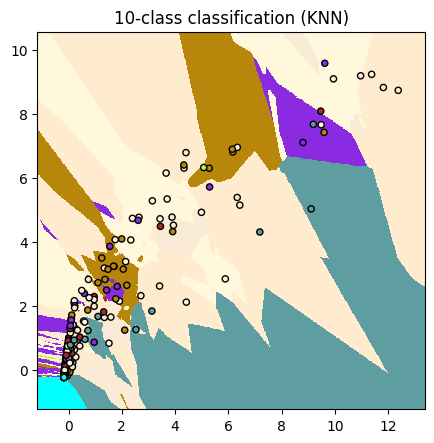

In [0]:

# orign data set, no PCA processing
KNN_plt(X_test, Y_test, X_test, Y_test,tit='10-class classification (KNN)')

(2007, 2) (2007,)


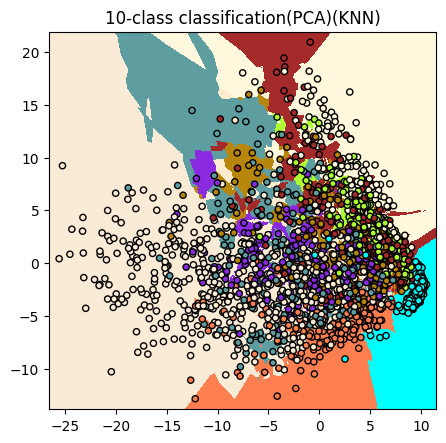

In [0]:

# data set after PCA processing ( keep 10 features)
KNN_plt(Xts_new, Y_test, Xts_new, Y_test, tit='10-class classification(PCA)(KNN)')

(2007, 2) (2007,)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


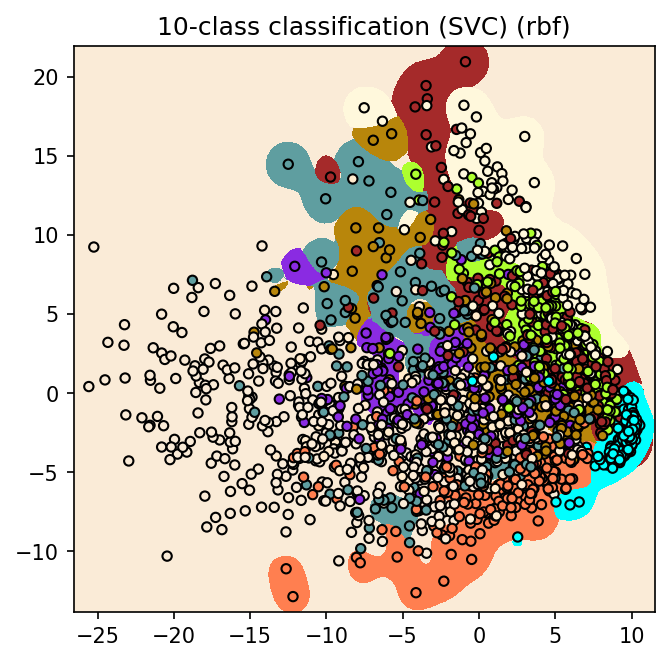

In [0]:
# data set after KPCA procesing (keep 10 features, svc, rbf)
KNN_plt(Xts_new, Y_test, Xts_new, Y_test, model=SVC(kernel='rbf'), tit='10-class classification (SVC) (rbf)')

(2007, 2) (2007,)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


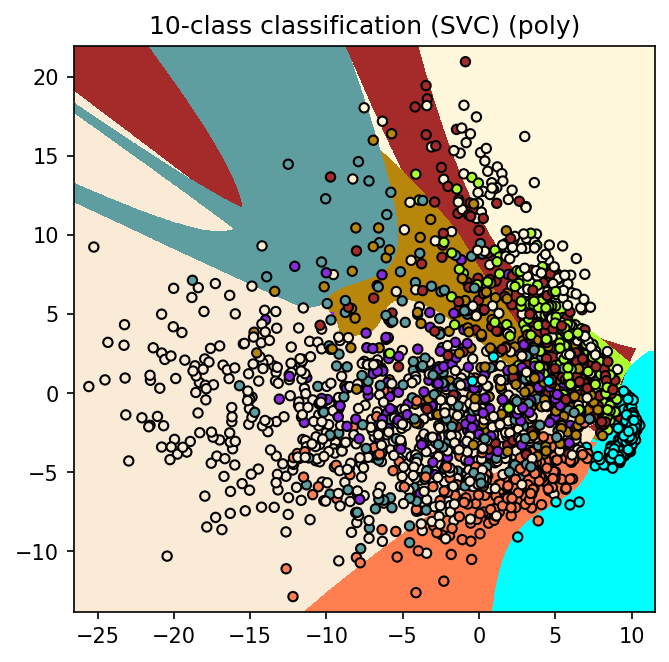

In [0]:
# data set after KPCA procesing (keep 10 features, svc, rbf)
KNN_plt(Xts_new, Y_test, Xts_new, Y_test, model=SVC(kernel='poly'), tit='10-class classification (SVC) (poly)')

(2007, 2) (2007,)


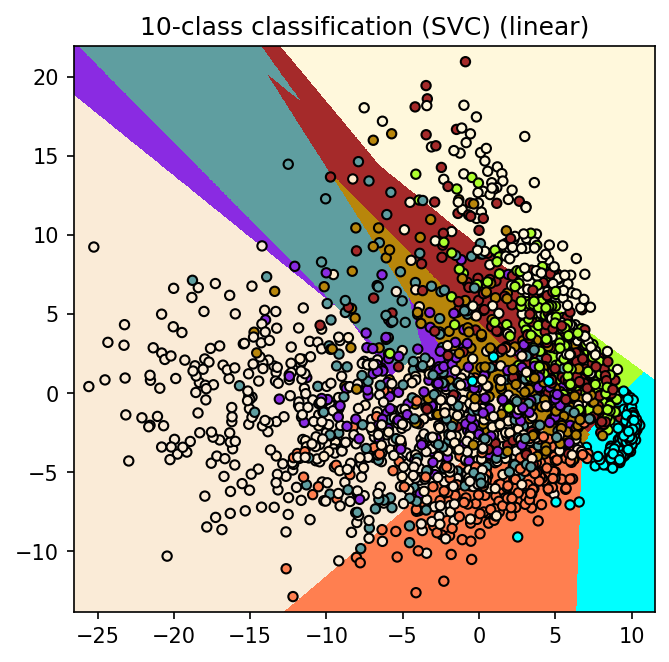

In [0]:
# data set after KPCA procesing (keep 10 features, svc, linear)
KNN_plt(Xts_new, Y_test, Xts_new, Y_test, model=SVC(kernel='linear'), tit='10-class classification (SVC) (linear)')

## with 256 d noise

In [0]:
# add noise to train set
def add_n(X):
    temp = np.asarray(X)
    noise = np.random.randn(X.shape[0], X.shape[1])
    temp = np.hstack((temp, noise))
    X = pd.DataFrame(temp)
    return X

X_train = add_n(X_train)
X_test = add_n(X_test)
print(X_train.shape, X_test.shape)

(7291, 512) (2007, 512)


In [0]:
# KPCA - SVM
# model = SVC(kernel='rbf')
model = SVC(kernel='poly')
# model = SVC(kernel='linear')

scorelist = []
i = 1
while True:
    if i >= X_train.shape[0]:
#             end = X_train.shape[0]
#             model.fit(X_train.iloc[i:end],Y_train.iloc[i:end])
#             predict = model.predict(X_test)
#             score = accuracy_score(predict, Y_test)
#             scorelist.append(score)
        break
    model.fit(X_train.iloc[i:i+100],Y_train.iloc[i:i+100])
    predict = model.predict(X_test)
    score = accuracy_score(predict, Y_test)
    scorelist.append(score)
    i += 100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

In [0]:
def plotF(ErrorRateList, title='unk', xlabel='unk', ylabel='unk', ylim=0.1):
    length = len(ErrorRateList)
    numIterList = [x for x in range(length)]
    plt.plot(numIterList, ErrorRateList, 'ro-')
    plt.xlim(0, length)
    plt.ylim(0, ylim)
    plt.xticks([x for x in range(length) if x%10 == 0], [x for x in numIterList ], rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

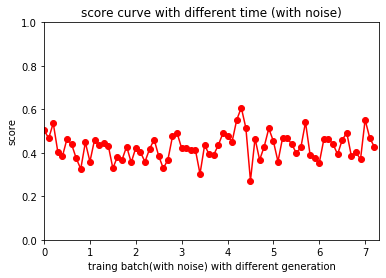

In [0]:
# print(scorelist[:20])
plotF(scorelist, 
    title='score curve with different time (with noise)',
    xlabel='traing batch(with noise) with different generation',
    ylabel='score',
    ylim=1)